In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
import pandas as pd
import os
import datetime as dt

# Directorio donde se encuentran los archivos
directory = 'directory/'

# Obtener la lista de archivos en la carpeta
file_list = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Fechas de inicio y fin para el filtro
start_date = dt.datetime(2013, 1, 1)
end_date = dt.datetime(2017, 4, 1)

# Función para leer y filtrar un dataframe
def read_and_filter_txt(file_path, start_date, end_date):
    df = pd.read_csv(file_path, delimiter=',', skiprows=9)
    #print(df.head())
    # Convertir la columna 'Date' a datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    # Establecer la columna 'Date' como índice
    df.set_index('timestamp', inplace=True)
    # Filtrar el dataframe por el rango de fechas
    filtered_df = df.loc[start_date:end_date]
    return filtered_df

# Leer y filtrar cada archivo en un dataframe y almacenarlos en un diccionario
dataframes = {}
for file in file_list:
    file_path = os.path.join(directory, file)
    df = read_and_filter_txt(file_path, start_date, end_date)
    # Asignar el dataframe al diccionario con el nombre del archivo (sin extensión) como clave
    file_name = os.path.splitext(file)[0]
    dataframes[file_name] = df

# Verificar los dataframes
for name, df in dataframes.items():
    print(f"DataFrame for {name}:\n{df.head()}\n")

# Acceder a un dataframe específico por su nombre
data = dataframes.get('dataexport_20240515T194154', None)
if data is not None:
    print(data.head())
else:
    print("El dataframe no se encontró.")

data.rename(columns={'Basel Temperature [2 m elevation corrected]': 'Temperature'}, inplace=True)

DataFrame for dataexport_20240515T194154:
                     Basel Temperature [2 m elevation corrected]  \
timestamp                                                          
2013-01-01 00:00:00                                     0.950245   
2013-01-01 01:00:00                                     0.860245   
2013-01-01 02:00:00                                     1.200245   
2013-01-01 03:00:00                                     1.770245   
2013-01-01 04:00:00                                     2.310246   

                     Basel Precipitation Total  Basel Wind Gust  \
timestamp                                                         
2013-01-01 00:00:00                        0.0        21.599998   
2013-01-01 01:00:00                        0.0        21.599998   
2013-01-01 02:00:00                        0.0        20.880001   
2013-01-01 03:00:00                        0.0        21.960000   
2013-01-01 04:00:00                        0.0        23.039999   

           

In [27]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1] 
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)


(29780, 1) (7445, 1)


In [3]:
df.head()

,Temperature,Basel Precipitation Total,Basel Wind Gust,Basel Cloud Cover Total,Basel Sunshine Duration,Basel Mean Sea Level Pressure [MSL],Basel Evapotranspiration
timestamp,,,,,,,
2013-01-01 00:00:00,0.950245,0.0,21.599998,29.100000,0.0,1012.7,0.00000
2013-01-01 01:00:00,0.860245,0.0,21.599998,29.400002,0.0,1012.6,0.00000
2013-01-01 02:00:00,1.200245,0.0,20.880001,28.800001,0.0,1012.5,0.00144
2013-01-01 03:00:00,1.770245,0.0,21.960000,28.200000,0.0,1012.1,0.00144
2013-01-01 04:00:00,2.310246,0.0,23.039999,29.400002,0.0,1011.4,0.00288


In [28]:
# Selecting Open Price values
dataset_train = train_data.Temperature.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape


(29780, 1)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train[:5])



[[0.23312758]
 [0.23127573]
 [0.23827161]
 [0.25000001]
 [0.26111112]]


In [30]:
# Selecting Open Price values
dataset_test = test_data.Temperature.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 
print(*scaled_test[:5])

[0.54041368] [0.5109831] [0.49413516] [0.47344847] [0.45169541]


In [31]:

X_train = []
y_train = []
for i in range(50, len(scaled_train)):
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= 51:
        print(X_train)
        print(y_train)
        print()

X_trainS = []
y_trainS = []
for i in range(50, len(scaled_train)):
    X_trainS.append(scaled_train[i-5:i, 0])
    y_trainS.append(scaled_train[i, 0])
    if i <= 51:
        print(X_trainS)
        print(y_trainS)
        print()


[array([0.23312758, 0.23127573, 0.23827161, 0.25000001, 0.26111112,
       0.27057614, 0.29279836, 0.30637861, 0.32736626, 0.33786008,
       0.35452676, 0.35761317, 0.36255145, 0.3617284 , 0.36193416,
       0.36090536, 0.35987654, 0.35473251, 0.35308643, 0.35164609,
       0.3526749 , 0.3489712 , 0.34403293, 0.33662551, 0.32242798,
       0.31028807, 0.29609054, 0.29115228, 0.29382716, 0.28600824,
       0.27530865, 0.26893005, 0.27654322, 0.28765433, 0.29567902,
       0.31502058, 0.3255144 , 0.33230453, 0.33683128, 0.32386831,
       0.32098766, 0.29979425, 0.2851852 , 0.26111112, 0.22366256,
       0.20823046, 0.19238684, 0.19465021, 0.19732511, 0.18786009])]
[0.1942386913580247]

[array([0.23312758, 0.23127573, 0.23827161, 0.25000001, 0.26111112,
       0.27057614, 0.29279836, 0.30637861, 0.32736626, 0.33786008,
       0.35452676, 0.35761317, 0.36255145, 0.3617284 , 0.36193416,
       0.36090536, 0.35987654, 0.35473251, 0.35308643, 0.35164609,
       0.3526749 , 0.3489712 , 0.344

In [32]:
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])
X_testS = []
y_testS = []
for i in range(50, len(scaled_test)):
	X_testS.append(scaled_test[i-5:i, 0])
	y_testS.append(scaled_test[i, 0])


In [33]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

# The data is converted to Numpy array
X_trainS, y_trainS = np.array(X_trainS), np.array(y_trainS)

#Reshaping
X_trainS = np.reshape(X_trainS, (X_trainS.shape[0], X_trainS.shape[1],1))
y_trainS = np.reshape(y_trainS, (y_trainS.shape[0],1))
print("X_train :",X_trainS.shape,"y_train :",y_trainS.shape)


X_train : (29730, 50, 1) y_train : (29730, 1)
X_train : (29730, 5, 1) y_train : (29730, 1)


In [34]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

# The data is converted to numpy array
X_testS, y_testS = np.array(X_testS), np.array(y_testS)

#Reshaping
X_testS = np.reshape(X_testS, (X_testS.shape[0], X_testS.shape[1],1))
y_testS = np.reshape(y_testS, (y_testS.shape[0],1))
print("X_testS :",X_testS.shape,"y_testS :",y_testS.shape)


X_test : (7395, 50, 1) y_test : (7395, 1)
X_testS : (7395, 5, 1) y_testS : (7395, 1)


In [35]:

# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [12]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 50,
						activation = "tanh",
						return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
								decay=1e-6, 
								momentum=0.9, 
								nesterov=True), 
				loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 4)
regressor.summary()


2024-05-20 20:01:42.469257: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 20:01:42.573055: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 20:01:42.573116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 20:01:42.575948: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-20 20:01:42.576015: I external/local_xla/xla/stream_executor

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
I0000 00:00:1716235306.022348      94 service.cc:145] XLA service 0x7ff63000b0c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716235306.022418      94 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-05-20 20:01:46.134284: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-20 20:01:46.380558: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


  4/420 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - loss: 0.0854

I0000 00:00:1716235309.326309      94 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


420/420 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 0.0170
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0050
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0035
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0031
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0023
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0021
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0020
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0018
Epoch 9/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0016
Epoch 10/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0016
Epoch 11/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 0.0015
Epoch 12/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0013
Epoch 13/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0013
Epoch 14/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 0.0012
Epoch 15/20
420/420 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

In [36]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
					return_sequences = True, 
					input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
					return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
					loss = 'mean_squared_error',
					metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 4, 
				epochs = 4)
regressorLSTM.summary()


Epoch 1/4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7433/7433 ━━━━━━━━━━━━━━━━━━━━ 189s 25ms/step - accuracy: 9.0798e-05 - loss: 0.0018
Epoch 2/4
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 187s 25ms/step - accuracy: 9.2598e-06 - loss: 1.8182e-04
Epoch 3/4
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 199s 27ms/step - accuracy: 1.0329e-04 - loss: 1.7166e-04
Epoch 4/4
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 196s 26ms/step - accuracy: 3.2016e-04 - loss: 1.6426e-04


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

232/232 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


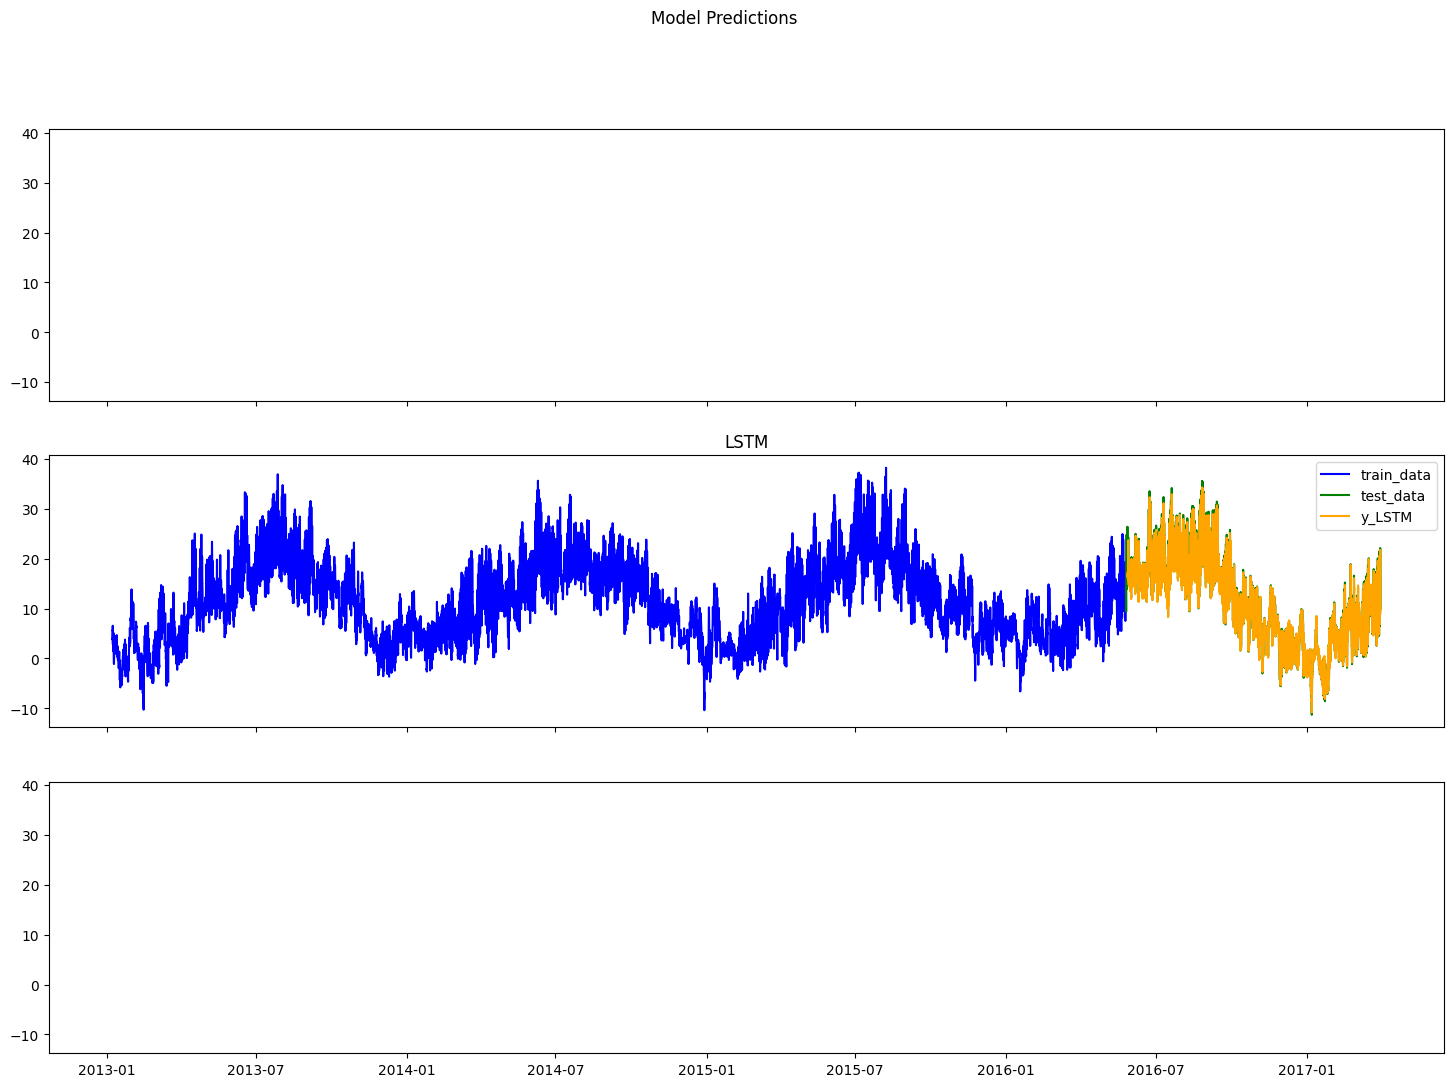

In [38]:
y_LSTM = regressorLSTM.predict(X_test)
y_LSTM_O = scaler.inverse_transform(y_LSTM) 

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

regressorLSTM.save('LSTM.keras')

In [39]:
import numpy as np
import pandas as pd
#import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN, Dropout
from keras.optimizers import SGD
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, MultiHeadAttention, LayerNormalization, Add

In [41]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=1):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size, 
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  n_timesteps, n_features, n_outputs = 5, 1, 1 
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs 
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
  
  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2, 
                                num_trans_blocks=4, mlp_units=[256], 
                                mlp_dropout=0.10, dropout=0.10, 
                                )

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

#callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, 
                                              #restore_best_weights=True)]

transformer.fit(X_trainS, y_trainS, batch_size=4,
                    epochs=20, validation_data=(X_testS, y_testS),
                    verbose=1)#, callbacks=callbacks)
transformer.summary()

Epoch 1/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 148s 16ms/step - loss: 0.0081 - mae: 0.0409 - mape: 593.7568 - val_loss: 2.9326e-04 - val_mae: 0.0124 - val_mape: 10566.1924
Epoch 2/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - loss: 3.8265e-04 - mae: 0.0147 - mape: 2229.8228 - val_loss: 2.0465e-04 - val_mae: 0.0099 - val_mape: 5875.1299
Epoch 3/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - loss: 3.2322e-04 - mae: 0.0135 - mape: 512.2264 - val_loss: 7.2473e-04 - val_mae: 0.0221 - val_mape: 3573.3960
Epoch 4/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - loss: 3.0026e-04 - mae: 0.0130 - mape: 3189.4482 - val_loss: 2.1824e-04 - val_mae: 0.0110 - val_mape: 4529.3911
Epoch 5/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 54s 7ms/step - loss: 2.9265e-04 - mae: 0.0129 - mape: 489.8415 - val_loss: 1.9227e-04 - val_mae: 0.0099 - val_mape: 959.1945
Epoch 6/20
7433/7433 ━━━━━━━━━━━━━━━━━━━━ 59s 8ms/step - loss: 2.9834e-04 - mae: 0.0130 - mape: 1128.7644 - val_loss: 2.4791e-04 - val_mae: 0.0121 - val_mape: 5

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 5, 1)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ input_layer_5[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 5, 1)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_16 (Add)        │ (None, 5, 1)      │          0 │ dropout_28[0][0], │
│                     │                   │            │ input_layer_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_16[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_16 (Conv1D)  │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 5, 2)      │          0 │ conv1d_16[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_17 (Conv1D)  │ (None, 5, 1)      │          3 │ dropout_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_17 (Add)        │ (None, 5, 1)      │          0 │ conv1d_17[0][0],  │
│                     │                   │            │ add_16[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_17[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 5, 1)      │      3,585 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 5, 1)      │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_18 (Add)        │ (None, 5, 1)      │          0 │ dropout_31[0][0], │
│                     │                   │            │ add_17[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 5, 1)      │          2 │ add_18[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_18 (Conv1D)  │ (None, 5, 2)      │          4 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 5, 2)      │          0 │ conv1d_18[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_19 (Conv1D)  │ (None, 5, 1)      │          3 │ dropout_32[0][0]

 Total params: 48,533 (189.59 KB)

 Trainable params: 16,177 (63.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 32,356 (126.39 KB)

232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


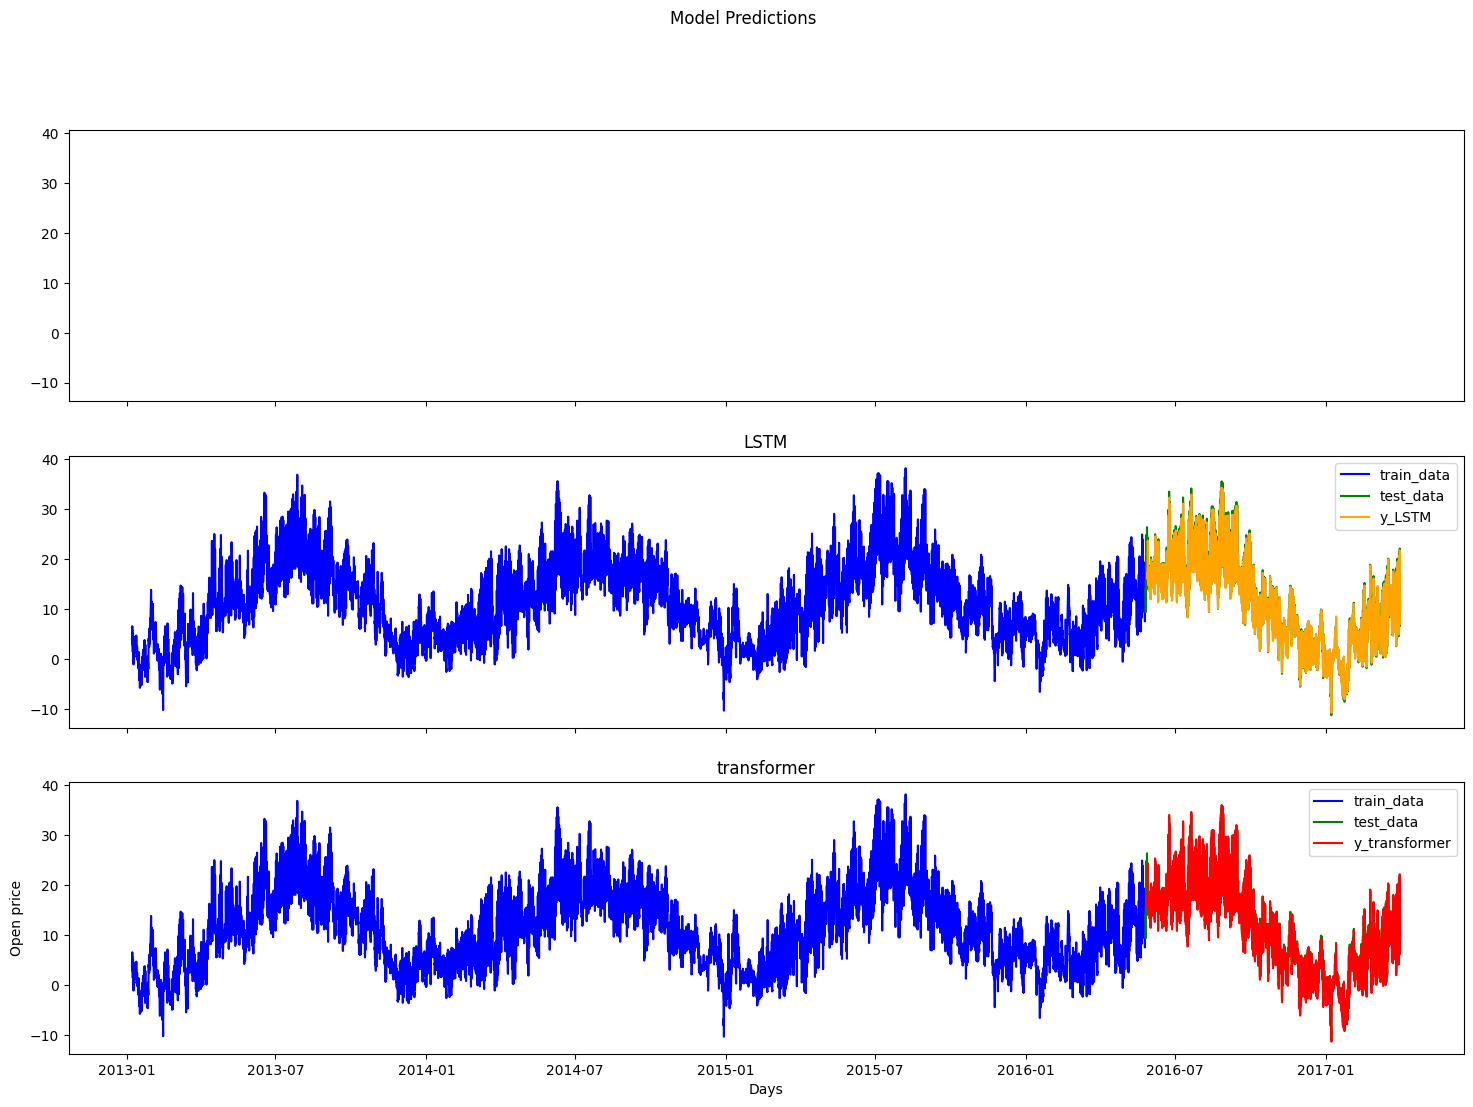

In [42]:
y_transformer = transformer.predict(X_testS)
y_transformer_0 = scaler.inverse_transform(y_transformer)

fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")#Plot for transformer predictions
axs[2].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_transformer_0, label = "y_transformer", color = "red")
axs[2].legend()
axs[2].title.set_text("transformer")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()

transformer.save('TRANS.keras')

In [16]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_transformer = transformer.predict(X_testS)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step


In [17]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_transformer_0 = scaler.inverse_transform(y_transformer)

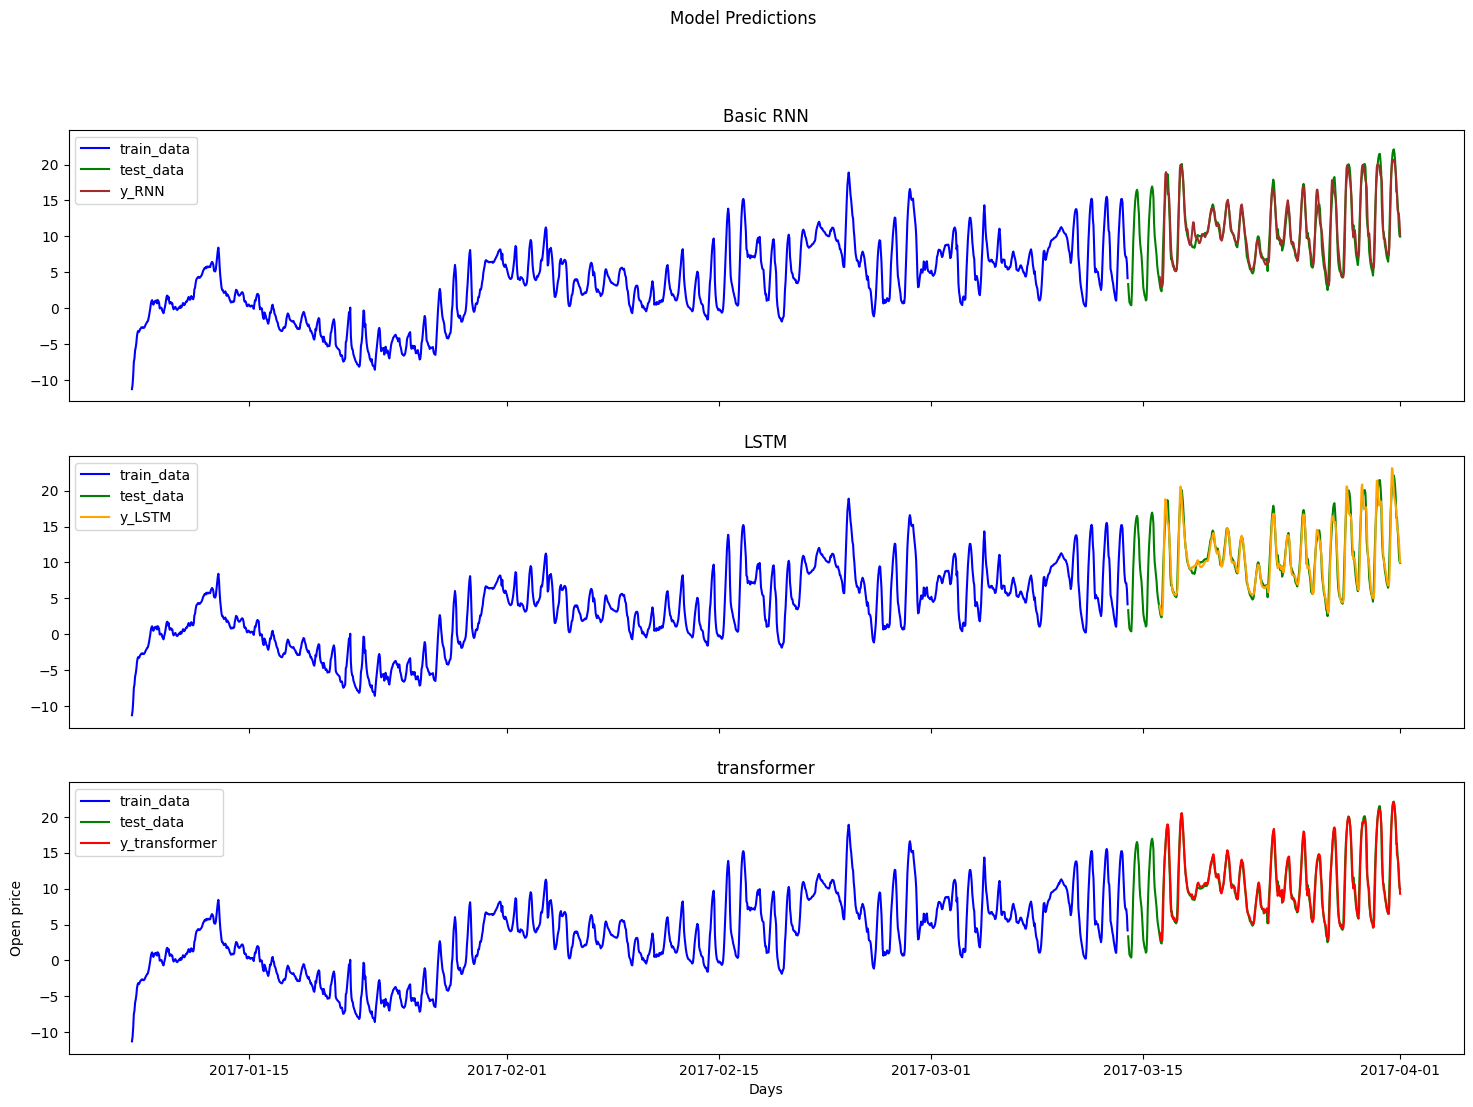

In [18]:
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')

#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

#Plot for transformer predictions
axs[2].plot(train_data.index[150:], train_data.Temperature[150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data.Temperature, label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_transformer_0, label = "y_transformer", color = "red")
axs[2].legend()
axs[2].title.set_text("transformer")

plt.xlabel("Days")
plt.ylabel("Open price")

plt.show()


In [19]:
regressor.save('WEATHER_RNN.keras')
regressorLSTM.save('WEATHER_LSTM.keras')
transformer.save('WEATHER_TRANS.keras')